# Lick model

### This notebook is an initial attempt to model trains of licks when rats are choosing between two solutions (e.g. protein and carbohydrate)

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# Run notebook that extracts data from medfiles
%run extractlicks.ipynb

FileNotFoundError: [Errno 2] No such file or directory: 'R:\\DA_and_Reward\\gc214\\IPP3\\IPP3_expdetails.xlsx'

In [21]:
# Initializes the system and system variables

System = {}
System['PP'] = 0.8
System['tau'] = 10
System['licksinburst'] = 0

In [22]:
def update_func(System, licks):
    pp = System['PP']
    tau = System['tau']
    x = System['licksinburst']
    
    if licks[-1] == 0:
            if random.random() < pp:
                licks.append(2)            
            else:
                licks.append(1)
            System['licksinburst'] = x+1
    else:
        p_cont = math.exp(-x*(1/tau))
        if random.random() < p_cont:           
            licks.append(licks[-1])
            System['licksinburst'] = x+1
        else:
            licks.append(0)
            System['licksinburst'] = 0  
            

In [23]:
# Initializes the arrays to store data

licks = [0]

for i in range(1, 1000):
    update_func(System, licks)
    # print(x, licks)

# print(licks)
print(np.mean([x-1 for x in licks if x>0]))

0.7857142857142857


In [24]:
#licks = test1_data_NR['IPP3.2']

In [25]:
# Create running average

N = 12
cumsum, licks_smooth = [0], []

for i, x in enumerate(licks, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        licks_smooth.append(moving_ave)
        

In [26]:
# Code to calculate burst data
burstarray = []

tmp = []
for i, x in enumerate(licks):
    if x == 0:
        burstarray.append(tmp)
        tmp = []
    else:
        tmp.append(x)
        

burstlength1 = [len(x) for x in burstarray[1:] if x[0]==1]
burstlength2 = [len(x) for x in burstarray[1:] if x[0]==2]

In [27]:
aaa = [np.nan]*5
type(aaa)

list

In [28]:
def replace_codes(inputList, codes_in, codes_out):
    if len(codes_in) != len(codes_out):
        print('Lists of codes must be the same length')
        return
        
    if type(inputList) != list:
        try:
            inputList.tolist()
        except:
            print('Cannot convert inputList to list. Check its type.')
            return
    
    outputList = [np.nan]*len(inputList)
    outputList = inputList
    
    code_indices = []
    for i,code in enumerate(codes_in):
        code_indices.append([idx for idx,x in enumerate(inputList) if x == codes_in[i]])
        
    for i,indexList in enumerate(code_indices):
        for index in indexList:
            outputList[index] = codes_out[i]
            
    return outputList

new_licks = replace_codes(licks, [0,1,2], [0.5,0,1])

newlist = [0.5 if x==0 else x for x in licks]
newlist = [0 if x==1 else x for x in newlist]
newlist = [1 if x==2 else x for x in newlist]
#newlist = [0.5 if x==0 else x for x in licks]

new_licks

[0.5,
 0,
 0,
 0,
 0.5,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,


In [29]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

#     if x.ndim != 1:
#         raise ValueError, "smooth only accepts 1 dimension arrays."

#     if x.size < window_len:
#         raise ValueError, "Input vector needs to be bigger than window size."


#     if window_len<3:
#         return x


#     if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
#         raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


[0.5,
 0,
 0,
 0,
 0.5,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 1,
 0.5,
 1,
 0.5,
 1,
 0.5,
 1,
 1,
 1,
 0.5,
 0,
 0,
 0,
 0,
 0,


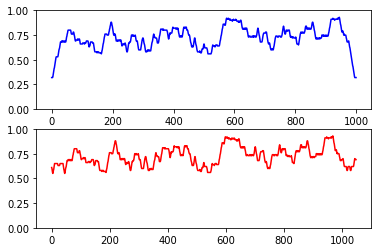

In [30]:
only_licks = [x for x in newlist if x > 0]
window = 50
avg_mask = np.ones(window) / window
y_avg = np.convolve(new_licks, avg_mask, 'same')


y_smooth = smooth(new_licks,window_len=50,window='flat')

f, ax = plt.subplots(nrows=2)

ax[0].plot(y_avg, 'b')
ax[1].plot(y_smooth, 'r')

for axis in ax:
    axis.set_ylim([0, 1])
    
licks

171

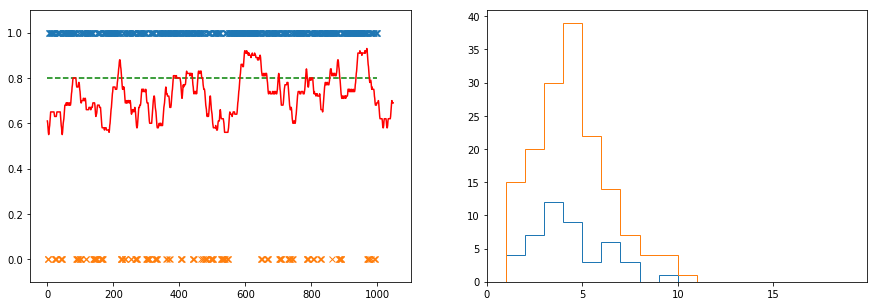

In [33]:
f, ax = plt.subplots(figsize=(15,5), ncols=2)

x1 = [i for i, x in enumerate(licks) if x == 1]
x2 = [i for i, x in enumerate(licks) if x == 0]

y1 = [1]*len(x1)
y2 = [0]*len(x2)

ax[0].plot(x1,y1, 'x')
ax[0].plot(x2,y2, 'x')
ax[0].plot(np.arange(0,len(licks)),[System['PP']]*len(licks), 'g', linestyle='dashed')
#ax[0].plot(y_avg, 'b')
ax[0].plot(y_smooth, 'r')

ax[0].set_ylim([-0.1, 1.1])


bins = np.arange(1,20)
ax[1].hist(burstlength1, bins=bins, histtype='step')
ax[1].hist(burstlength2, bins=bins, histtype='step')
ax[1].set_xticks([0, 5, 10, 15])
len(x2)

AxesSubplot(0.125,0.125;0.775x0.755)


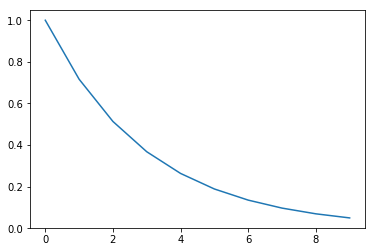

In [68]:
f, ax = plt.subplots()

lick_array = np.arange(0,10)
k=3
next_lick_p = [math.exp(-x*(1/k)) for x in lick_array]

ax.plot(lick_array, next_lick_p)



In [1]:
%who_ls


[]

[0 1 1 ... 1 1 1]
4775
[0 2 2 ... 2 2 2]
4638
[0 2 2 ... 1 1 1]
1854
[0 1 1 ... 1 0 1]
1466
[0 1 0 ... 1 1 1]
513
[0 1 1 ... 0 1 1]
3015


In [7]:
%who_ls dict

['System', 'test1_data_NR', 'test1_data_PR']